In [9]:
import sys
!{sys.executable} -m pip install numpy matplotlib sympy ipywidgets plotly bokeh

  Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.6 MB/s eta 0:00:00
Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


In [2]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit, QubitBra
init_printing()

Bit is used as the most fundamental concept in classical information and computation. 
There is an analogous concept in quantum information and computation, called _quantum bit_ aka. _qubit_.
Similarly to a classical bit, qubit also has a _state_ (0 or 1). These two states are represented as $| 0 \rangle$ and $| 1 \rangle$. 
This notation is called the _Dirac notation_ and basically is a shorthand representation of row (*bra*) and column (*ket*) vectors.

The main difference between bits and qubits is that qubits exist in so-called _superposition_ of states (linear combination of states):
$$| \Psi \rangle = \alpha | 0 \rangle + \beta | 1 \rangle ,$$
where $\alpha$ and $\beta$ are complex numbers, though for simplicity it's easier to think of them as real numbers (not much of a difference for now). Additionally, $| \alpha |^2 + | \beta |^2 = 1$.
The states $| 0 \rangle $ and $| 1 \rangle $ are also called _computational basis states_, and for an _orthonormal_ basis for the vector space.

In quantum information, we cannot measure a qubit to determine its quantum state. When qubit is measure, we get 0 with probability $| \alpha |^2$ and 1 with probability $| \beta |^2$.
For example, a qubit in state: $\frac{1}{\sqrt{2}} | 0 \rangle + \frac{1}{\sqrt{2}} | 1 \rangle $, which when measure gives 0 50% of the time and 1 otherwise.
We can also write the superposition of states in the following way:
$$| \Psi \rangle = e^{i\gamma}(\cos \frac{\theta}{2} | 0 \rangle + e^{i \varphi} \sin \frac{\theta}{2} | 1 \rangle ),$$
where $\theta$, $\varphi$ and $\gamma$ are real numbers. We can also ignore $e^{i\gamma}$ because it has _no observable effect_ (just a scaling factor).
The numbers $\theta$ and $\varphi$ define a point on the unit three-dimensional sphere, known as _Bloch sphere_.

We can define qubits in sympy using:

In [4]:
#| output: true
psi = Qubit('0')
psi

Which in normal vector form looks like:

In [5]:
represent(psi)

Standard qubit would look like:

In [6]:
#| output: true
a, b = symbols('alpha, beta')
ket0 = Qubit('0')
ket1 = Qubit('1')
psi = a * ket0 + b * ket1
psi

If we want to specify probabilities:

In [7]:
#| output: true
psi.subs(
  [([a, 1/sqrt(2)]), ([b, 1/sqrt(2)])]
)
psi

Bloch sphere?

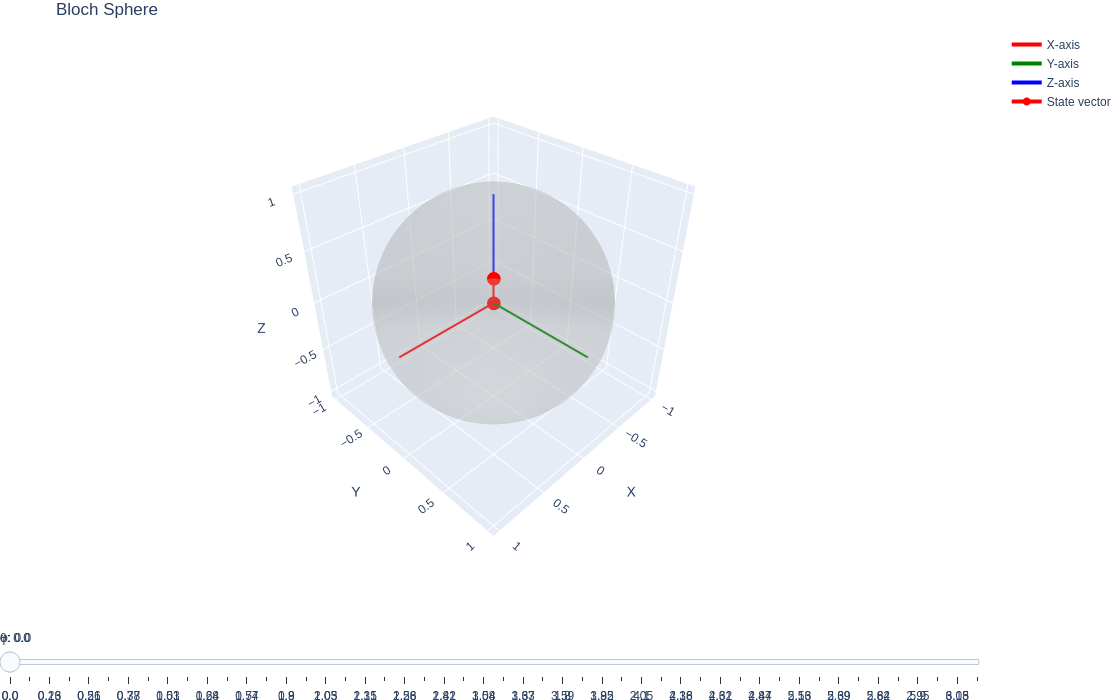

In [15]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Slider, CustomJS
import numpy as np

output_notebook()

def create_bloch_sphere(theta, phi):
    # Create the circle (2D projection of sphere)
    t = np.linspace(0, 2*np.pi, 100)
    x = np.cos(t)
    y = np.sin(t)
    
    # Calculate the point on the circle
    x_point = np.sin(theta) * np.cos(phi)
    y_point = np.sin(theta) * np.sin(phi)
    
    source = ColumnDataSource(data=dict(x=[0, x_point], y=[0, y_point]))
    
    p = figure(width=400, height=400, x_range=(-1.1, 1.1), y_range=(-1.1, 1.1))
    p.line(x, y, color="lightgrey", line_width=2)
    p.line([0, 1], [0, 0], color="red", line_width=2)
    p.line([0, 0], [0, 1], color="green", line_width=2)
    p.scatter(0, 0, size=10, color="blue")
    p.line('x', 'y', source=source, color="red", line_width=3)
    p.scatter('x', 'y', source=source, size=10, color="red")
    
    callback = CustomJS(args=dict(source=source), code="""
        const theta = theta_slider.value;
        const phi = phi_slider.value;
        const x = Math.sin(theta) * Math.cos(phi);
        const y = Math.sin(theta) * Math.sin(phi);
        source.data = {x: [0, x], y: [0, y]};
        source.change.emit();
    """)
    
    theta_slider = Slider(start=0, end=np.pi, value=theta, step=0.1, title="θ")
    phi_slider = Slider(start=0, end=2*np.pi, value=phi, step=0.1, title="φ")
    
    theta_slider.js_on_change('value', callback)
    phi_slider.js_on_change('value', callback)
    
    callback.args['theta_slider'] = theta_slider
    callback.args['phi_slider'] = phi_slider
    
    layout = column(p, theta_slider, phi_slider)
    show(layout)

create_bloch_sphere(0, 0)